In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np  # Se usa para generar índices para el colormap

# Leer el archivo JSON exportado
with open("estadisticas.json", "r", encoding="utf-8") as f:
    data_export = json.load(f)


In [2]:
# Obtener la lista de variables (mediciones)
measurements = list(data_export.keys())
n = len(measurements)
# Configurar una cuadrícula de subplots (por ejemplo, 2 columnas)
ncols = 2
nrows = (n + 1) // 2  # redondea hacia arriba en caso de número impar

C:\Users\PC\AppData\Local\Temp\ipykernel_17140\254565117.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(categorias))


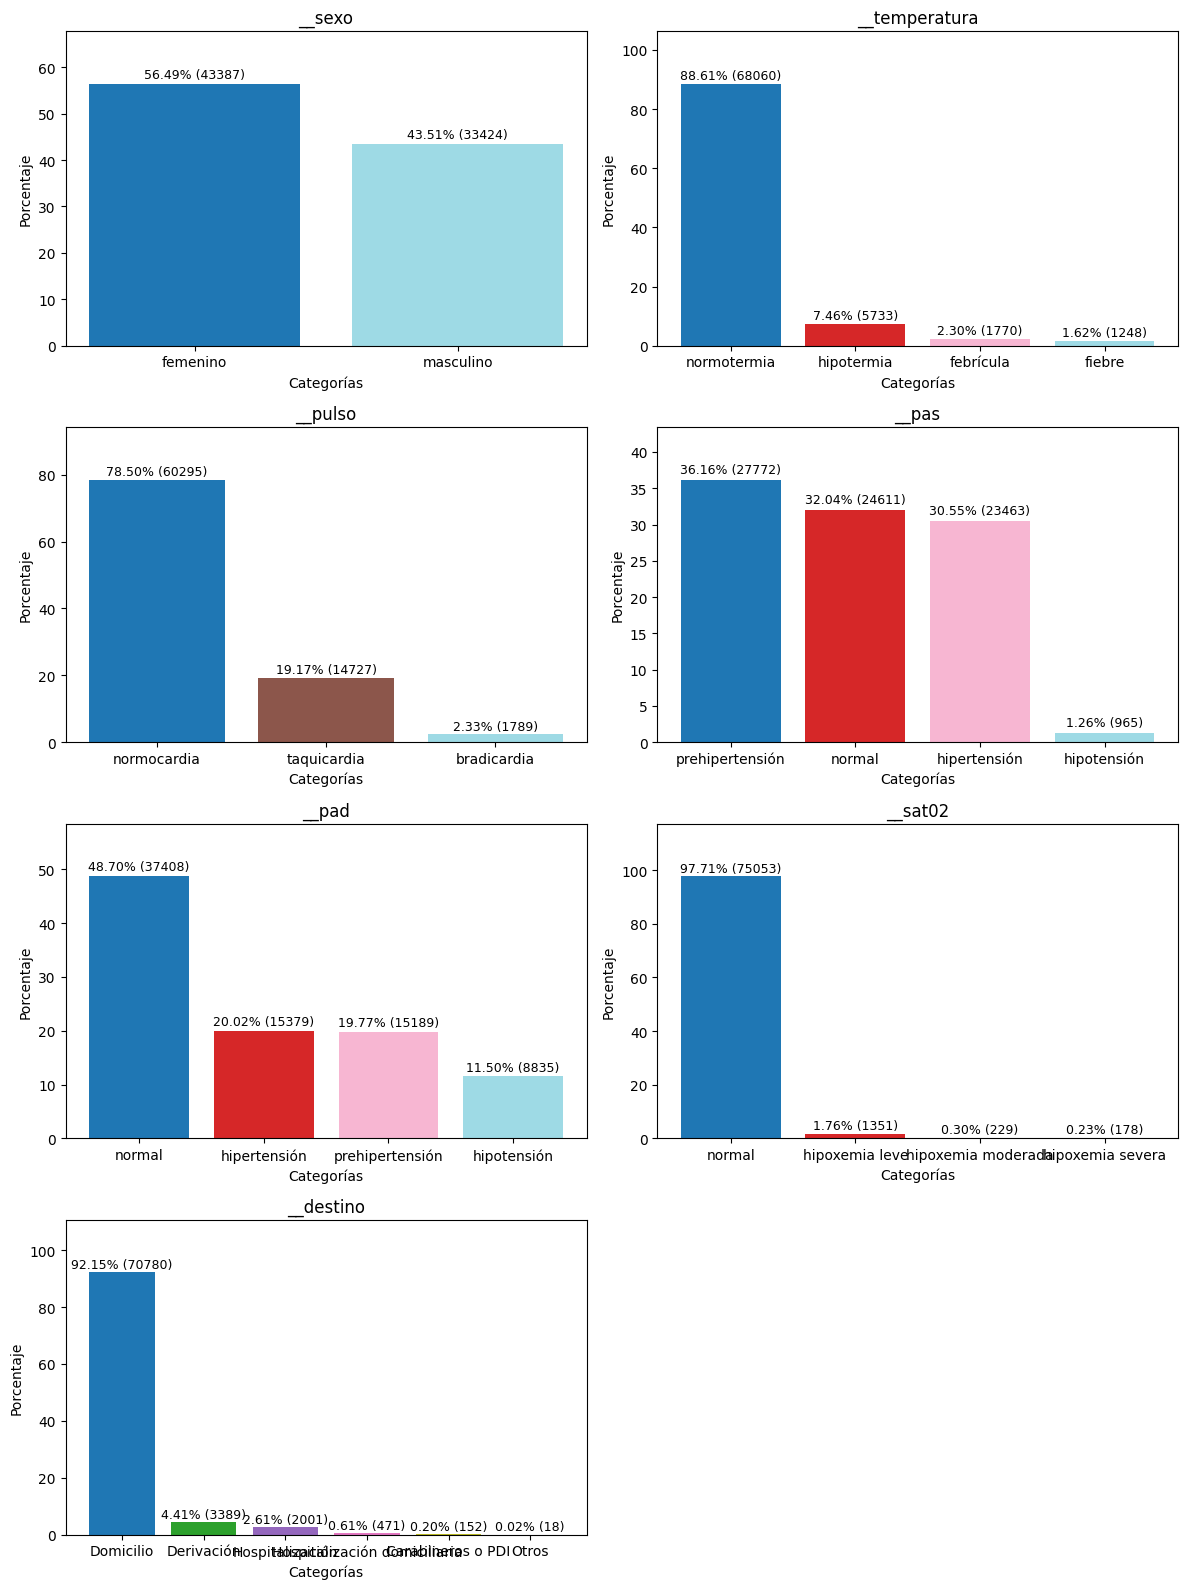

In [3]:
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
axs = axs.flatten()  # para iterar fácilmente sobre todos los ejes

for i, measurement in enumerate(measurements):
    ax = axs[i]
    items = data_export[measurement]
    # Extraer categorías, porcentajes y cuentas
    categorias = [item["categoria"] for item in items]
    porcentajes = [item["porcentaje_limpios"] for item in items]
    cuentas = [item["cuenta"] for item in items]
    
    # Generar una lista de colores distintos usando el colormap 'tab20'
    cmap = plt.cm.get_cmap('tab20', len(categorias))
    colores = [cmap(j) for j in range(len(categorias))]
    
    # Crear el gráfico de barras basado en el porcentaje, asignando un color distinto a cada barra
    bars = ax.bar(categorias, porcentajes, color=colores)
    ax.set_title(f"{measurement}")
    ax.set_ylabel("Porcentaje")
    ax.set_xlabel("Categorías")
    # Ajustar límite superior del eje y para dejar espacio a las anotaciones
    ax.set_ylim(0, max(porcentajes)*1.2 if max(porcentajes) > 0 else 1)
    
    # Agregar anotación: "XX.XX% (cuenta)" sobre cada barra
    for bar, pct, cnt in zip(bars, porcentajes, cuentas):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.5,
            f"{pct:.2f}% ({cnt})",
            ha='center',
            va='bottom',
            fontsize=9
        )

# Eliminar ejes vacíos en caso de que la cuadrícula tenga más subplots de los necesarios
for j in range(i+1, nrows*ncols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()